In [1]:
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

[Tutorial link](https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f)

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Automated Machine Learning (AutoML) is the process of automating tasks in the machine learning pipeline such as data preprocessing, hyperparameter tuning, model selection and evaluation.

### Importing packages

In [2]:
import h2o
from h2o.automl import H2OAutoML

<IPython.core.display.Javascript object>

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.301-b09, mixed mode)
  Starting server from C:\Users\anups\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\anups\AppData\Local\Temp\tmproqyic5o
  JVM stdout: C:\Users\anups\AppData\Local\Temp\tmproqyic5o\h2o_anups_started_from_python.out
  JVM stderr: C:\Users\anups\AppData\Local\Temp\tmproqyic5o\h2o_anups_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.6
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_anups_5vdwzx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.518 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


<IPython.core.display.Javascript object>

Dataset from UCI which describes a bank’s marketing campaign which offers clients to place a term deposit. The target variable is yes if the customer agrees and no if the customer decides not to place a term deposit.

### Loading dataset

In [4]:
df = h2o.import_file("bank.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


<IPython.core.display.Javascript object>

In [5]:
df.describe(chunk_summary=True)

Rows:41188
Cols:21

Chunk compression summary: 


,chunk_type,chunk_name,count,count_percentage,size,size_percentage
0,C0L,Constant long,146,14.484127,11.4 KB,1.754736
1,C0D,Constant double,143,14.186507,11.2 KB,1.718680
2,CBS,Binary,58,5.753968,10.1 KB,1.549516
3,CXI,Sparse Integers,75,7.440476,13.2 KB,2.035074
4,C1N,1-Byte Integers (w/o NAs),433,42.956350,391.8 KB,60.281660
5,C1S,1-Byte Fractions,67,6.646825,61.7 KB,9.496910
6,C2,2-Byte Integers,68,6.746032,118.7 KB,18.267288
7,C2S,2-Byte Fractions,18,1.785714,31.8 KB,4.896136



Frame distribution summary: 


,,size,number_of_rows,number_of_chunks_per_column,number_of_chunks
0,127.0.0.1:54321,650.0 KB,41188.0,48.0,1008.0
1,mean,650.0 KB,41188.0,48.0,1008.0
2,min,650.0 KB,41188.0,48.0,1008.0
3,max,650.0 KB,41188.0,48.0,1008.0
4,stddev,0 B,0.0,0.0,0.0
5,total,650.0 KB,41188.0,48.0,1008.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,1.0,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,40.02406040594349,,,,,,,,,,258.2850101971448,2.5675925026706814,962.4754540157328,0.17296299893172776,,0.08188550063125184,93.5756643682626,-40.50260027192386,3.6212908128581147,5167.035910944936,
maxs,98.0,,,,,,,,,,4918.0,56.0,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.42124998093405,,,,,,,,,,259.27924883646483,2.770013542902328,186.91090734474173,0.49490107983928977,,1.5709597405170257,0.5788400489541186,4.628197856174542,1.7344474048512668,72.25152766826159,
zeros,0,,,,,,,,,,4,0,15,35563,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<IPython.core.display.Javascript object>

H2O provides 10 rows of sample data along with basic summary statistics for numerical columns.

### Splitting dataset to train and test sets

In [6]:
train, test = df.split_frame(ratios=[0.8], seed=1)

<IPython.core.display.Javascript object>

### Training AutoML models

In [8]:
aml = H2OAutoML(max_runtime_secs=600, balance_classes=True, seed=1)

<IPython.core.display.Javascript object>

AutoML training parameters - max_models: Maximum number of models to train, balance_classes: set to True to balance the class labels for tasks with imbalance data

Limit the amount of time spent on searching for the best model by limiting: maximum number of models using max_models, total time spent using max_runtime_secs or time spend training any single model using max_runtime_secs_per_model.

In [9]:
aml.train(training_frame=train, y="y")

AutoML progress: |
17:04:55.152: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


<IPython.core.display.Javascript object>

H2O AutoML trains and cross validates the following models in the following order:

three pre-specified XGBoost GBM (Gradient Boosting Machine) models,
a fixed grid of GLMs,
a default Random Forest (DRF),
five pre-specified H2O GBMs,
a near-default Deep Neural Net,
an Extremely Randomized Forest (XRT),
a random grid of XGBoost GBMs,
a random grid of H2O GBMs,
a random grid of Deep Neural Nets

In addition, it also trains:
a stacked ensemble of all the models trained above,
a “Best of Family” Stacked Ensemble that contains the best performing model for each algorithm class

### Evaluation

After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

In [11]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210824_170455,0.951251,0.169715,0.679469,0.160506,0.233709,0.0546198
StackedEnsemble_BestOfFamily_AutoML_20210824_170455,0.950657,0.17055,0.67597,0.151211,0.234358,0.0549236
GBM_grid__1_AutoML_20210824_170455_model_7,0.950428,0.171803,0.676306,0.153905,0.235285,0.0553589
GBM_grid__1_AutoML_20210824_170455_model_21,0.950405,0.172262,0.673293,0.137676,0.235443,0.0554333
GBM_grid__1_AutoML_20210824_170455_model_10,0.95016,0.172585,0.669187,0.154613,0.235781,0.0555926
GBM_grid__1_AutoML_20210824_170455_model_8,0.95007,0.172163,0.671885,0.158602,0.23525,0.0553425
GBM_grid__1_AutoML_20210824_170455_model_30,0.950004,0.17347,0.670083,0.146589,0.236437,0.0559026
GBM_grid__1_AutoML_20210824_170455_model_14,0.949544,0.173083,0.668582,0.162535,0.235967,0.0556805
GBM_grid__1_AutoML_20210824_170455_model_27,0.949339,0.175177,0.665927,0.140686,0.237404,0.0563604
GBM_grid__1_AutoML_20210824_170455_model_3,0.949247,0.175682,0.665116,0.159172,0.237725,0.0565133


<IPython.core.display.Javascript object>

Examining the best performing model and its results.

In [12]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210824_170455

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03813263128678406
RMSE: 0.19527578264286655
LogLoss: 0.12443314229696177
Null degrees of freedom: 10093
Residual degrees of freedom: 10075
Null deviance: 7097.977460398365
Residual deviance: 2512.0562766910643
AIC: 2550.0562766910643
AUC: 0.9784985246052379
AUCPR: 0.8598092657280183
Gini: 0.9569970492104758

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4754279368575462: 


,,no,yes,Error,Rate
0,no,8692.0,267.0,0.0298,(267.0/8959.0)
1,yes,256.0,879.0,0.2256,(256.0/1135.0)
2,Total,8948.0,1146.0,0.0518,(523.0/10094.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.475428,0.770715,166.0
1,max f2,0.259189,0.836514,245.0
2,max f0point5,0.589984,0.803753,126.0
3,max accuracy,0.559197,0.948682,136.0
4,max precision,0.987761,1.000000,0.0
5,max recall,0.033348,1.000000,353.0
6,max specificity,0.987761,1.000000,0.0
7,max absolute_mcc,0.475428,0.741520,166.0
8,max min_per_class_accuracy,0.261679,0.922759,244.0
9,max mean_per_class_accuracy,0.147527,0.927843,290.0



Gains/Lift Table: Avg response rate: 11.24 %, avg score: 11.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,0.910191,8.893392,8.893392,1.000000,0.939172,1.000000,0.939172,0.088987,0.088987,789.339207,789.339207,0.088987
1,2,0.020012,0.850427,8.893392,8.893392,1.000000,0.876699,1.000000,0.907936,0.088987,0.177974,789.339207,789.339207,0.177974
2,3,0.030018,0.785606,8.277018,8.687934,0.930693,0.819037,0.976898,0.878303,0.082819,0.260793,727.701836,768.793417,0.260012
3,4,0.040024,0.734487,7.748698,8.453125,0.871287,0.757892,0.950495,0.848200,0.077533,0.338326,674.869804,745.312514,0.336094
4,5,0.050030,0.699055,7.924805,8.347461,0.891089,0.717242,0.938614,0.822009,0.079295,0.417621,692.480482,734.746107,0.414161
5,6,0.100059,0.522597,5.952409,7.149935,0.669307,0.611912,0.803960,0.716960,0.297797,0.715419,495.240895,614.993501,0.693318
6,7,0.149990,0.332180,3.299731,5.868229,0.371032,0.429050,0.659841,0.621117,0.164758,0.880176,229.973079,486.822898,0.822692
7,8,0.200020,0.178808,1.496908,4.774857,0.168317,0.253349,0.536899,0.529129,0.074890,0.955066,49.690758,377.485736,0.850702
8,9,0.299980,0.036933,0.431889,3.327679,0.048563,0.093184,0.374174,0.383862,0.043172,0.998238,-56.811079,232.767940,0.786719
9,10,0.400040,0.008259,0.017611,2.499752,0.001980,0.018269,0.281080,0.292418,0.001762,1.000000,-98.238932,149.975235,0.675968




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.05461978238667509
RMSE: 0.23370875547714315
LogLoss: 0.16971462736166074
Null degrees of freedom: 33061
Residual degrees of freedom: 33045
Null deviance: 23313.54384185832
Residual deviance: 11222.210019662454
AIC: 11256.210019662454
AUC: 0.9512507161130527
AUCPR: 0.6794692115090611
Gini: 0.9025014322261053

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36397737453869133: 


,,no,yes,Error,Rate
0,no,27425.0,1904.0,0.0649,(1904.0/29329.0)
1,yes,956.0,2777.0,0.2561,(956.0/3733.0)
2,Total,28381.0,4681.0,0.0865,(2860.0/33062.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363977,0.660090,205.0
1,max f2,0.126885,0.771458,301.0
2,max f0point5,0.476214,0.642062,158.0
3,max accuracy,0.467295,0.919001,162.0
4,max precision,0.966879,1.000000,0.0
5,max recall,0.000575,1.000000,398.0
6,max specificity,0.966879,1.000000,0.0
7,max absolute_mcc,0.274069,0.621227,240.0
8,max min_per_class_accuracy,0.184580,0.885881,276.0
9,max mean_per_class_accuracy,0.101962,0.895449,314.0



Gains/Lift Table: Avg response rate: 11.29 %, avg score: 11.29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010011,0.842592,7.732875,7.732875,0.873112,0.884098,0.873112,0.884098,0.077418,0.077418,673.287483,673.287483,0.075986
1,2,0.020023,0.779502,6.956912,7.344893,0.785498,0.808121,0.829305,0.846110,0.069649,0.147067,595.691161,634.489322,0.143214
2,3,0.030004,0.723528,6.602255,7.097846,0.745455,0.748794,0.801411,0.813737,0.065899,0.212965,560.225507,609.784626,0.206249
3,4,0.040016,0.679777,5.940132,6.808199,0.670695,0.700574,0.768707,0.785424,0.059470,0.272435,494.013222,580.819898,0.262002
4,5,0.050027,0.644415,6.047162,6.655899,0.682779,0.661136,0.751511,0.760552,0.060541,0.332976,504.716163,565.589949,0.318963
5,6,0.100024,0.490717,4.977531,5.816969,0.562008,0.566921,0.656789,0.663765,0.248862,0.581838,397.753121,481.696911,0.543139
6,7,0.150021,0.334943,3.723772,5.119377,0.420448,0.414332,0.578024,0.580638,0.186177,0.768015,272.377201,411.937741,0.696652
7,8,0.200018,0.187724,2.319990,4.419636,0.261948,0.258602,0.499017,0.500141,0.115992,0.884008,131.999033,341.963647,0.771048
8,9,0.300012,0.039046,0.934961,3.258195,0.105566,0.097196,0.367880,0.365840,0.093490,0.977498,-6.503854,225.819524,0.763716
9,10,0.400006,0.008992,0.174133,2.487238,0.019661,0.019533,0.280832,0.279269,0.017412,0.994910,-82.586678,148.723803,0.670624


<IPython.core.display.Javascript object>

Evaluating the best model on a holdout test set using the evaluation metrics above.

In [13]:
best_model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.057177597461059645
RMSE: 0.23911837541489706
LogLoss: 0.17769934535037596
Null degrees of freedom: 8125
Residual degrees of freedom: 8107
Null deviance: 5686.431711522346
Residual deviance: 2887.9697606343107
AIC: 2925.9697606343107
AUC: 0.9454892325211264
AUCPR: 0.6396811090713735
Gini: 0.8909784650422528

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3232609714214396: 


,,no,yes,Error,Rate
0,no,6644.0,575.0,0.0797,(575.0/7219.0)
1,yes,192.0,715.0,0.2117,(192.0/907.0)
2,Total,6836.0,1290.0,0.0944,(767.0/8126.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323261,0.650888,214.0
1,max f2,0.211496,0.755903,260.0
2,max f0point5,0.504258,0.619653,142.0
3,max accuracy,0.504258,0.915210,142.0
4,max precision,0.958376,1.000000,0.0
5,max recall,0.001476,1.000000,394.0
6,max specificity,0.958376,1.000000,0.0
7,max absolute_mcc,0.323261,0.610640,214.0
8,max min_per_class_accuracy,0.202213,0.879824,264.0
9,max mean_per_class_accuracy,0.122396,0.886664,302.0



Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010091,0.850288,6.992551,6.992551,0.780488,0.892450,0.780488,0.892450,0.070562,0.070562,599.255116,599.255116,0.068069
1,2,0.020059,0.781720,6.747057,6.870557,0.753086,0.813678,0.766871,0.853306,0.067255,0.137817,574.705650,587.055688,0.132553
2,3,0.030027,0.715407,6.636449,6.792841,0.740741,0.746688,0.758197,0.817912,0.066152,0.203969,563.644902,579.284075,0.195796
3,4,0.040118,0.674178,6.009224,6.595735,0.670732,0.693650,0.736196,0.786656,0.060639,0.264609,500.922365,559.573461,0.252696
4,5,0.050086,0.642674,4.756122,6.229620,0.530864,0.657697,0.695332,0.760991,0.047409,0.312018,375.612180,522.962002,0.294841
5,6,0.100049,0.497755,5.075412,5.653226,0.566502,0.567029,0.630996,0.664129,0.253583,0.565601,407.541236,465.322604,0.524044
6,7,0.150012,0.349807,3.795526,5.034501,0.423645,0.421801,0.561936,0.583419,0.189636,0.755237,279.552577,403.450060,0.681266
7,8,0.200098,0.209320,2.421407,4.380424,0.270270,0.276648,0.488930,0.506632,0.121279,0.876516,142.140707,338.042368,0.761403
8,9,0.300025,0.045152,0.948881,3.237515,0.105911,0.112004,0.361362,0.375197,0.094818,0.971334,-5.111856,223.751462,0.755653
9,10,0.400074,0.009532,0.209379,2.480248,0.023370,0.021745,0.276838,0.286807,0.020948,0.992282,-79.062126,148.024779,0.666614


<IPython.core.display.Javascript object>

### Explainability

H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210824_170455,0.951251,0.169715,0.679469,0.160506,0.233709,0.0546198,2116,0.033732,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210824_170455,0.950657,0.17055,0.67597,0.151211,0.234358,0.0549236,931,0.007964,StackedEnsemble
GBM_grid__1_AutoML_20210824_170455_model_7,0.950428,0.171803,0.676306,0.153905,0.235285,0.0553589,920,0.002389,GBM
GBM_grid__1_AutoML_20210824_170455_model_21,0.950405,0.172262,0.673293,0.137676,0.235443,0.0554333,1268,0.002249,GBM
GBM_grid__1_AutoML_20210824_170455_model_10,0.95016,0.172585,0.669187,0.154613,0.235781,0.0555926,1038,0.002562,GBM
GBM_grid__1_AutoML_20210824_170455_model_8,0.95007,0.172163,0.671885,0.158602,0.23525,0.0553425,1118,0.002419,GBM
GBM_grid__1_AutoML_20210824_170455_model_30,0.950004,0.17347,0.670083,0.146589,0.236437,0.0559026,1117,0.003044,GBM
GBM_grid__1_AutoML_20210824_170455_model_14,0.949544,0.173083,0.668582,0.162535,0.235967,0.0556805,1070,0.002297,GBM
GBM_grid__1_AutoML_20210824_170455_model_27,0.949339,0.175177,0.665927,0.140686,0.237404,0.0563604,1236,0.002591,GBM
GBM_grid__1_AutoML_20210824_170455_model_3,0.949247,0.175682,0.665116,0.159172,0.237725,0.0565133,1167,0.002337,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_AutoML_20210824_170455


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4754279368575462: 


,,no,yes,Error,Rate
0,no,8692.0,267.0,0.0298,(267.0/8959.0)
1,yes,256.0,879.0,0.2256,(256.0/1135.0)
2,Total,8948.0,1146.0,0.0518,(523.0/10094.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

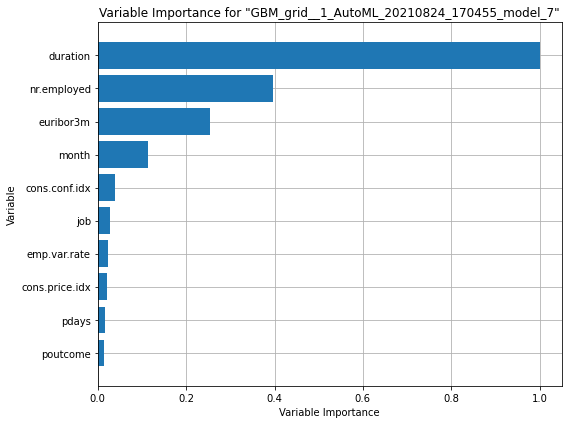

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

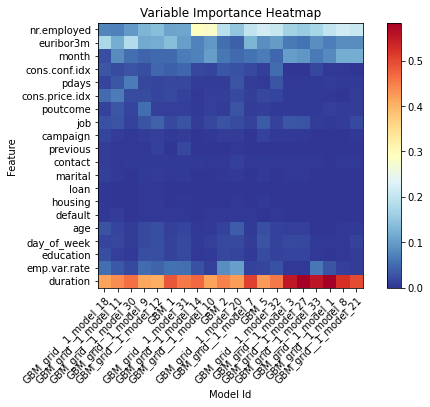

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

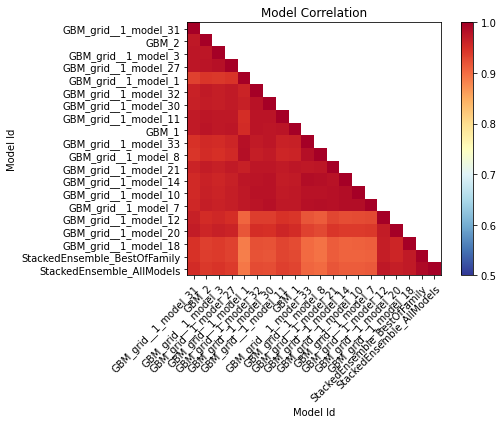

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

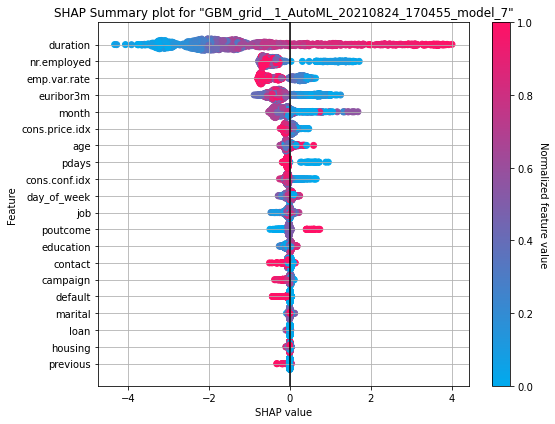

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

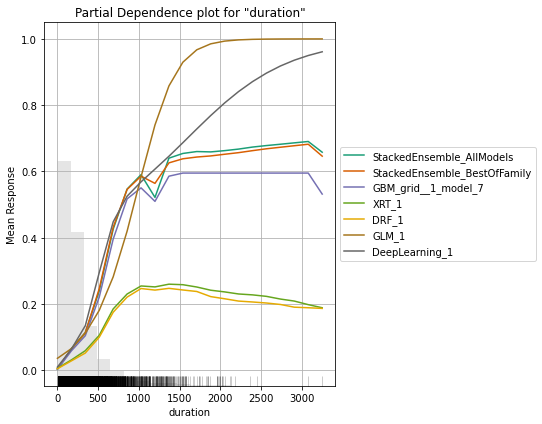

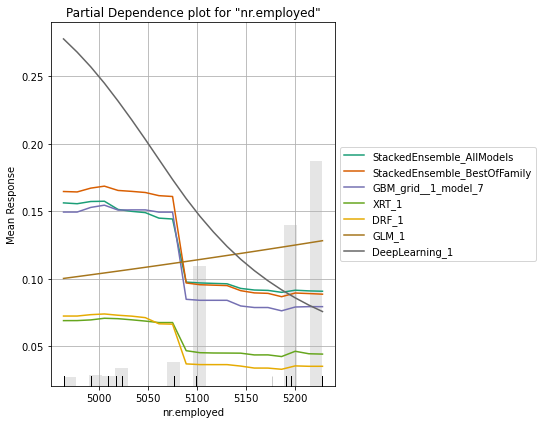

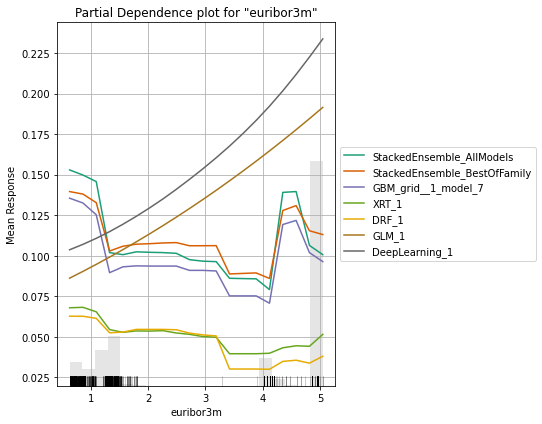

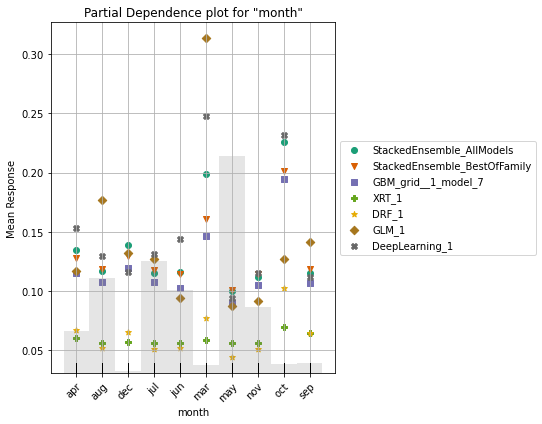

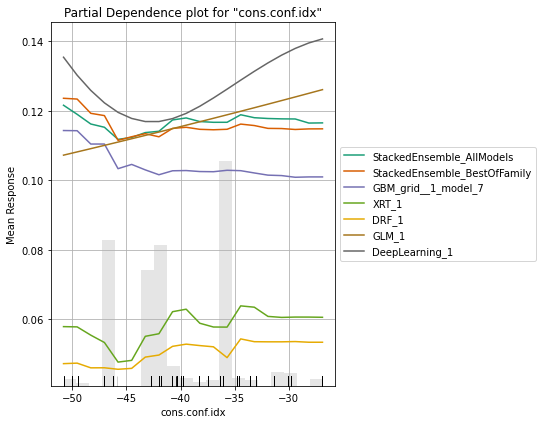

<IPython.core.display.Javascript object>

In [14]:
explain_model = aml.explain(frame=test, figsize=(8, 6))